### Morphology in image processing refers to a set of techniques used to analyze and process images based on their shapes and structures. These operations are primarily applied to binary images but can be extended to grayscale images as well. Morphological operations rely on the interaction between an image and a structuring element, which is a small matrix or kernel that defines the neighborhood of pixels to be examined. 
> Common morphological operations include erosion, dilation, opening, and closing, which are used to remove noise, fill holes, separate objects, or detect edges. For example, erosion shrinks objects by removing pixels on their boundaries, while dilation expands them by adding pixels. Morphology is widely used in applications such as object detection, segmentation, and feature extraction, making it a fundamental tool in computer vision and medical imaging.

<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px;">
  <h1 style="color: green;">- Morphology </h1>
  <h4 style="color: green;">1- Patterning
    </h4>

</div>
<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px;">
  <h4 style="color:rgb(86, 143, 143) ;">- Amirreza zare <br/> - 3/7/2025 </h4>
</div>

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

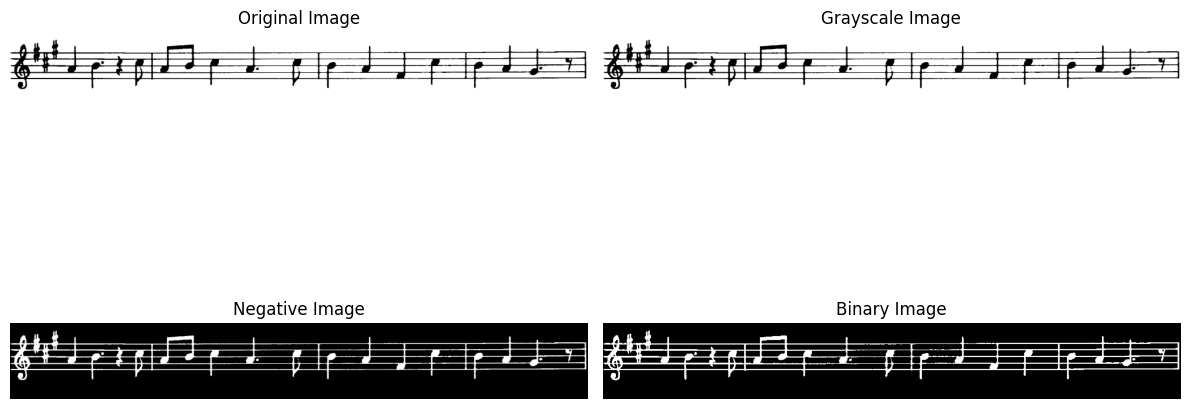

In [2]:
img = cv2.imread('../data/images/notes.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
negative_img = cv2.bitwise_not(gray_img)
binary_img = cv2.adaptiveThreshold(negative_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)


plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:

cols = binary_img.shape[1]
horizontal_size = cols // 30

horizontalStracture = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontalStracture

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

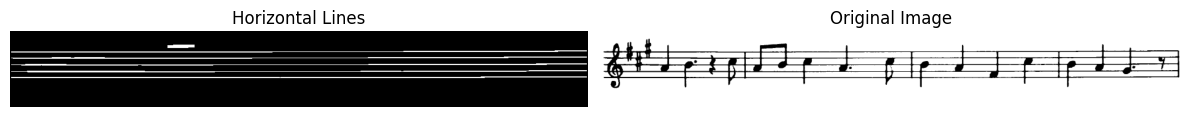

In [4]:
horizontal = cv2.morphologyEx(binary_img , cv2.MORPH_OPEN , horizontalStracture)


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(horizontal, cmap='gray') 
plt.title('Horizontal Lines')
plt.axis('off')

plt.subplot(122)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image') 
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:

cols = binary_img.shape[0]
vert_size = cols // 30

vertlStracture = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vert_size))
vertlStracture

array([[1],
       [1],
       [1],
       [1]], dtype=uint8)

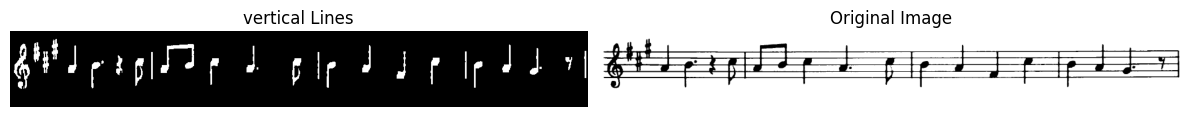

In [6]:
verticals = cv2.morphologyEx(binary_img , cv2.MORPH_OPEN , vertlStracture)


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(verticals, cmap='gray') 
plt.title('vertical Lines')
plt.axis('off')

plt.subplot(122)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image') 
plt.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 1023.5, 133.5, -0.5)

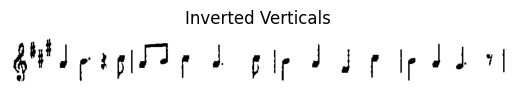

In [7]:
raw_result = cv2.bitwise_not(verticals)

plt.imshow(raw_result, cmap='gray')
plt.title('Inverted Verticals')
plt.axis('off')


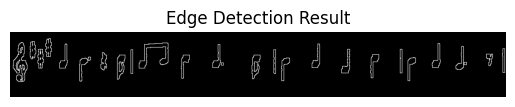

In [8]:
edges = cv2.adaptiveThreshold(raw_result , 255 , cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY , 3, -2)

plt.imshow(edges, cmap='gray')
plt.title('Edge Detection Result')
plt.axis('off')
plt.show()

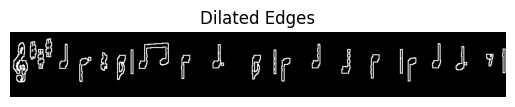

In [9]:

kernel = np.ones((2,2) , np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

plt.imshow(edges, cmap='gray')
plt.title('Dilated Edges')
plt.axis('off')
plt.show()